In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


In [2]:
# FUNCIONES DE ACTIVACION
class function(object):
    def __init__(self,funcion,derivative=None):
        self.F=funcion
        self.D=derivative

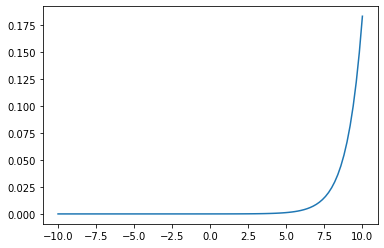

In [3]:


#funciones de activación

def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce



lineal=function(funcion=lambda x:x,derivative=lambda x:1)
sigm=function(funcion=lambda x: 1 / (1 + np.e ** (-x)),derivative=lambda x: x * (1 - x))
tanh=function(funcion=lambda x: 2 / (1 + np.e ** (2*x))-1,derivative=lambda x:1-((2 / (1 + np.e ** (2*x)))-1)**2)

softmax=function(funcion=lambda x: np.exp(x) / np.sum(np.exp(x), axis=0), derivative=lambda x:x*(1-x))
relu=function(funcion=lambda x: np.maximum(0, x) ,derivative=lambda x: np.where(x<=0,0,1))

# funciones de coste
l2_cost=function(funcion=lambda Yp, Yr: np.mean((Yp - Yr) ** 2) ,derivative=lambda Yp, Yr: (Yp - Yr))

_x = np.linspace(-10, 10, 100)

plt.plot(_x, softmax.F(_x),"tab:blue")



In [4]:
# CLASE DE LA CAPA DE LA RED
from IPython.display import clear_output
import time

class neural_layer():
 
  def __init__(self, n_conn, n_neur, act_f):
    self.act = act_f
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1
    
# creación de una red neuronal según topologia
def create_nn(topology):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l][0], topology[l+1][0], topology[l][1]))
  return nn
    
# fucnción de predicción (fordware pass)    
def predict(neural_net, X):
  
  out = [(None, X)] #primer data necesario
  
  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act.F(z)
    out.append((z, a))
  return out[-1][1]
  
# función retropropagación del error
def backward_pass(neural_net, X, Y, l2_cost, lr=0.5,momentun=1,batch_size=1):
  sx=np.shape(X)
  sy=np.shape(Y)
  X=X.reshape(1,sx[0])
  Y=Y.reshape(1,sy[0])
  out = [(None, X)] #primer data necesario
  
  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act.F(z)
    out.append((z, a))
  acc=np.round(a)==Y
  # Backward pass 
  deltas = []
  for l in reversed(range(0, len(neural_net))):
    z = out[l+1][0]
    a = out[l+1][1]
    if l == len(neural_net) - 1:
      deltas.insert(0, l2_cost.D(a, Y) * neural_net[l].act.D(a))
    else:
      deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act.D(a))
    _W = neural_net[l].W
 
    # Gradient descent
    neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
    neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
  return out[-1][1],acc


# función de entrenamiento de la red
def train(neural_net,X,Y,l2_cost,lr=0.5,epoch=1000,momentun=1,batch_size=1):
    loss = []
    ACC =[]
    for i in range(epoch):
        account=0
        # Entrenemos a la red!
        for j in range(len(X)):
            pY,acc = backward_pass(neural_n, X[j,:], Y[j,:], l2_cost, lr,momentun,batch_size)
            if acc.all():
                account+=1
        print("Epoch={}, Loss={} Accuracy={}".format(i,round(l2_cost.F(pY,Y[j,:]),15),round(account/len(Y),3)),end="")
        clear_output(wait=True)
        ACC.append(account/len(Y))    
        loss.append(l2_cost.F(pY,Y[j,:]))
     
    return loss,ACC

# Realiza un ejemplo de clasificación y regresión
Hay varios datasets dentro del directorio o si lo prefieres puede bajar más de esta web:
https://www.mldata.io/datasets/

Debes realizar, usando este perceptrón un ajuste de una red para un dataset de clasificación y otro de regresión
    - Nota: la regresión da una aproximación por lo que sólo tiene una neurona de salida

Ajusta los vectores de entrada y normaliza los datos a flotantes...
Guarda algunos valores separados para luego probar tu red
Entrena la red usando varias topologias no muy complicadas.
No te preocupes si el error no es muy bajo. 
Indica cómo crees que se comporta la red que has definido

En el perceptrón se han añadido dos Hiperparámetros, Bath_size y momentun que ya hemos visto en teoría.
Debes intentar modificar el algoritmo backpropagation para que se pueda entrenar:
    - Usando un valor distinto de batch_size. (ahora es solo 1)
    - Añadir el momentun al algoritmo base de tal forma que tenga en cuenta el delta anterior en la aproximación al punto de convergencia

In [19]:
#ATRIBUTOS: Peso Izquierdo[0], Distancia Izquierda[1], Peso Derecho[2], Distancia Derecha[3], Balance[4]
#El Balance puede ser: L izquierda, R derecha o B equilibrado.
import csv
X=[]
Y=[]
with open('balance_scale_dataset.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        #row=row[0].split(",")
        X.append([float(row[0])/10,float(row[1])/10,float(row[2])/10,float(row[3])/10])

        if row[4]=="L":
            Y.append([1,0,0]) #Balance a la izquierda
        if row[4]=="B":
            Y.append([0,1,0]) #Balance equilibrado
        if row[4]=="R":
            Y.append([0,0,1]) #Balance a la derecha


Xtrain=np.array(X)
Ytrain=np.array(Y)

print(np.shape(Xtrain))


(625, 4)


In [20]:
# definicion de la red
# definicion de la red
#topology = [(4,sigm),(16,sigm),(3,sigm)] #buena configuracion
topology = [(4,sigm),(16,sigm),(3,sigm),(3,softmax)]
neural_n = create_nn(topology)  

# FUNCION DE ENTRENAMIENTO

epoch=400
lr=0.2
batch_size=1
momentun=1
loss = []
accuracy=[]

loss,accuracy=train(neural_n,Xtrain,Ytrain,l2_cost,lr,epoch,momentun,batch_size)

Epoch=399, Loss=0.018760666427796 Accuracy=0.981

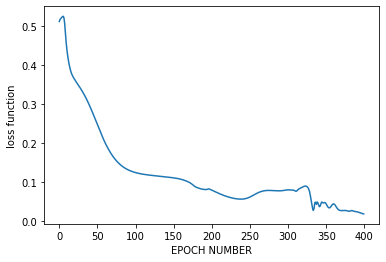

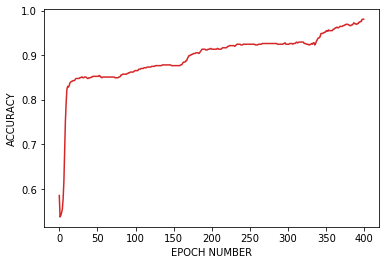

In [21]:
plt.plot(range(len(loss)), loss)
plt.ylabel("loss function")
plt.xlabel("EPOCH NUMBER")
plt.show()
plt.plot(range(len(accuracy)), accuracy, "tab:red")
plt.ylabel("ACCURACY")
plt.xlabel("EPOCH NUMBER")
plt.show()
  
 

In [22]:
# VISUALIZACIÓN Y TEST
#  ahora podemos interrogar. el primer valor es el bias
def print_predict(X,Y):
    for i in range(len(X)):
        sal=np.round(predict(neural_n,X[i]))
        print("predecir ",X[i],"--",Y[i]," predict: ",sal)

print_predict(Xtrain,Ytrain)
print("::::::::::::::::::::::::::::")


predecir  [0.1 0.1 0.1 0.1] -- [0 1 0]  predict:  [[0. 1. 0.]]
predecir  [0.1 0.1 0.1 0.2] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.1 0.3] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.1 0.4] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.1 0.5] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.2 0.1] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.2 0.2] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.2 0.3] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.2 0.4] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.2 0.5] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.3 0.1] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.3 0.2] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.3 0.3] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.3 0.4] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.3 0.5] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.1 0.1 0.4 0.1] -- [0 0 1]  predict:  [[0. 

predecir  [0.2 0.1 0.2 0.4] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.2 0.5] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.3 0.1] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.3 0.2] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.3 0.3] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.3 0.4] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.3 0.5] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.4 0.1] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.4 0.2] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.4 0.3] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.4 0.4] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.4 0.5] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.5 0.1] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.5 0.2] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.5 0.3] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.2 0.1 0.5 0.4] -- [0 0 1]  predict:  [[0. 

predecir  [0.4 0.2 0.2 0.4] -- [0 1 0]  predict:  [[0. 1. 0.]]
predecir  [0.4 0.2 0.2 0.5] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.4 0.2 0.3 0.1] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.4 0.2 0.3 0.2] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.4 0.2 0.3 0.3] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.4 0.2 0.3 0.4] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.4 0.2 0.3 0.5] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.4 0.2 0.4 0.1] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.4 0.2 0.4 0.2] -- [0 1 0]  predict:  [[0. 1. 0.]]
predecir  [0.4 0.2 0.4 0.3] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.4 0.2 0.4 0.4] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.4 0.2 0.4 0.5] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.4 0.2 0.5 0.1] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.4 0.2 0.5 0.2] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.4 0.2 0.5 0.3] -- [0 0 1]  predict:  [[0. 0. 1.]]
predecir  [0.4 0.2 0.5 0.4] -- [0 0 1]  predict:  [[0. 

predecir  [0.5 0.3 0.1 0.2] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.1 0.3] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.1 0.4] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.1 0.5] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.2 0.1] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.2 0.2] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.2 0.3] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.2 0.4] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.2 0.5] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.3 0.1] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.3 0.2] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.3 0.3] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.3 0.4] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.3 0.5] -- [0 1 0]  predict:  [[0. 1. 0.]]
predecir  [0.5 0.3 0.4 0.1] -- [1 0 0]  predict:  [[1. 0. 0.]]
predecir  [0.5 0.3 0.4 0.2] -- [1 0 0]  predict:  [[1. 

In [24]:
print("Juan Antonio Silva Luján - Entrega02 (Perceptrón Múltiple - Clasificación 1)")

Juan Antonio Silva Luján - Entrega02 (Perceptrón Múltiple - Clasificación 1)
